# MapReduce as a programming model



In [137]:
def fun(x):
    return x**2

def add(x,y):
    return x+y

def maxi(x,y):
    return max(x,y)


L = [1,3,4,2,7]

S = map(fun, L)

print(L)
print(S)

print reduce(add, S)
print reduce(maxi, S)

[1, 3, 4, 2, 7]
[1, 9, 16, 4, 49]
79
49


# Spark

RDD : Resilient Distributed Dataset



## Load a text file on the HDFS as a RDD
* Display number of lines

In [141]:
import sys
import numpy as np

#textFile = sc.textFile("notes/data/books-eng/hamlet.txt")
textFile = sc.textFile("notes/data/books-eng")
textFile.count()

132647

## Get the first line

In [142]:
textFile.first()

u'ACT I'

## Find number of lines where a word appears

In [143]:
word = "Hamlet"
textFile.filter(lambda line: word in line).count()

82

## Get a random sample from the file

In [146]:
textFile.sample(withReplacement=False, fraction=0.05).first()

u"SCENE I. Alexandria. A room in CLEOPATRA's palace."

## Find the line with most words

In [148]:
textFile.map(lambda line: len(line.split())).reduce(lambda a, b: a if (a < b) else b)

0

## Counting words

In [149]:
wordCounts = textFile.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b)
wordCounts.collect()

[(u'rear.', 1),
 (u'yellow', 25),
 (u'grenadier,', 1),
 (u'men?...', 1),
 (u'approchez,', 1),
 (u'mentioning.', 1),
 (u'Certains', 1),
 (u'crossbar', 1),
 (u'vanterie,', 1),
 (u'CORRIDOR', 21),
 (u'circonstances.', 1),
 (u'wood:', 2),
 (u'Ottoman.', 1),
 (u'writing.', 6),
 (u'feigned.', 1),
 (u'seven,', 2),
 (u'her!', 18),
 (u'WOOD,', 1),
 (u'Napoleon--that', 1),
 (u'atom.', 1),
 (u'chin,', 5),
 (u'colloquies', 1),
 (u'humbugged', 2),
 (u'apartments?"', 1),
 (u'rencontrerons', 1),
 (u'so...quiet.', 1),
 (u'kid!', 3),
 (u'momentary;', 1),
 (u'understood.', 8),
 (u'Poltava', 1),
 (u'admiral', 4),
 (u'kid.', 11),
 (u'insinuation', 1),
 (u'toyshop,', 1),
 (u'fervent', 1),
 (u"X-wing's", 1),
 (u'hers', 19),
 (u'undivulged', 1),
 (u'idiocy--Gossner', 1),
 (u'shriek', 4),
 (u'momie', 1),
 (u'sooner;', 1),
 (u'Stop,', 4),
 (u'sooner.', 2),
 (u'pressed,', 2),
 (u'"shelter"', 2),
 (u'remnant', 2),
 (u"CAESAR's", 13),
 (u'Indeed,', 15),
 (u'MALCOLM', 41),
 (u'cents', 1),
 (u'fingertips.', 1),
 (u

## Using the Cache
Pull a data sets into a cluster-wide in-memory cache. 

Very useful when using iterative algorithms.



In [39]:
textFile.cache()

notes/data/hamlet.txt MapPartitionsRDD[30] at textFile at NativeMethodAccessorImpl.java:-2

## Find words that start with an 'H' or 'h'

In [113]:
words = textFile.flatMap(lambda line: line.split())
words_subset = words.filter(lambda x: x[0] in ['H','h'])
counts = words_subset.map(lambda w: (w,1)).reduceByKey(lambda a,b: a+b)
counts.collect()

[(u'honour.', 11),
 (u'hallucination.', 1),
 (u'Han', 309),
 (u'happy!', 4),
 (u'happen--she', 1),
 (u'honour;', 1),
 (u'harmlessly', 3),
 (u'her--filled', 1),
 (u'habiliments', 1),
 (u'heath.', 1),
 (u'heiress,', 1),
 (u'heavens', 20),
 (u'herself,"', 1),
 (u'history:', 5),
 (u'happen--despite', 1),
 (u'heave.', 2),
 (u'hyssop', 1),
 (u'happy."', 4),
 (u'hotly,', 2),
 (u'him."', 31),
 (u'hopeful', 3),
 (u'happiness...', 1),
 (u'him?"', 31),
 (u'humming,', 1),
 (u'Hie', 10),
 (u'hail,', 9),
 (u'host;', 1),
 (u'humanity', 27),
 (u'horse._]', 1),
 (u'happened.', 17),
 (u'haut,', 1),
 (u'hostess.', 8),
 (u'hears.', 1),
 (u'hardships', 3),
 (u'harms.', 1),
 (u'homes', 9),
 (u'home!...', 1),
 (u'homeopaths,', 1),
 (u'hangman.', 1),
 (u'hesitated:', 2),
 (u'harlot', 1),
 (u"hang'd", 2),
 (u'house--that', 1),
 (u'hero!', 1),
 (u'howling,', 1),
 (u'hereabout:', 2),
 (u'Hurrah!', 3),
 (u'hinges', 2),
 (u'histoire.', 1),
 (u'Hercules', 2),
 (u'hereafter;', 2),
 (u'homme?', 3),
 (u'happily..."', 

### Cleanup using a regular expression

* remove all non-alphanumeric characters

In [121]:
import re

# Compile a regular expression that matches non-alphanumerics
pattern = re.compile('[\W_]+', re.UNICODE)

# Replace all non-alphanumerics with a space, then split into words
words = textFile.map(lambda line: pattern.sub(' ',line)).flatMap(lambda line: line.split())

#first_letters = set(['H','h','Q','q','s','S'])
first_letters = set(['H'])
# Count words that start with H
words_subset = words.filter(lambda x: x[0] in first_letters)
counts = words_subset.map(lambda w: (w,1)).reduceByKey(lambda a,b: a+b)
res = counts.collect()
for r,c in res:
    print r,c

Han 430
Hugh 1
Howlings 1
Helicopter 1
Hyrcan 1
Heh 2
Hoists 1
Hoffman 1
HUT 1
Hmm 6
Harness 1
Hie 10
HARRELL 1
Highnesses 1
Hurry 11
Hiding 2
Hecate 4
HOLT 2
Hussars 3
Hold 42
Hofmarschal 1
Herein 2
Hollow 1
Hercules 7
Hyrcanian 1
Hanging 3
He 2497
Halfway 4
Hop 1
Hadn 1
Heights 8
HAVE 2
HATCH 1
HANKS 1
Hurrah 47
Huttese 21
Hermit 1
Honour 1
Heat 2
Hi 4
Herself 3
HARTLEY 1
HEAD 1
Hebrew 1
HOSKER 1
Honestly 1
Historical 1
Hosanna 1
Honor 6
House 3
Hollandais 2
Hush 3
Hectors 1
Harpier 1
Hack 1
Huge 2
HODENFIELD 1
Hover 1
Hmph 1
Hecatommythi 1
Hadst 4
Hang 17
HARDBURGER 1
Hamlet 86
Hors 5
Haugwitz 1
HOLLY 1
Half 16
HOME 1
HOLE 1
HENDERSON 1
Hate 2
Hood 1
Higher 4
Hosjeradek 2
Havoc 1
Hamlets 1
Hydra 1
HYPERSPACE 2
Happy 5
Hohenlohe 1
Hunts 1
Held 1
HUGH 1
HURREN 1
Host 1
Hé 1
Hear 20
Ho 15
Historians 1
Hamburg 2
HOOTKINS 1
HOLMAN 1
HANCOCK 1
Hostilities 1
Honest 8
Herald 2
HOLD 12
Hyperion 2
History 12
HEADQUARTERS 3
Helena 4
Hill 7
HERRON 1
HAROLD 1
Hide 2
Harsh 1
Her 132
HERMAN 2
Hoot

## Counting Letter bigrams



In [ ]:
import re

#textFile = sc.textFile("notes/data/books-eng/hamlet.txt")
textFile = sc.textFile("notes/data/books-eng")

# Compile a regular expression that matches non-alphanumerics
pattern = re.compile(u'[\W0-9_]+', re.UNICODE)

# Replace all non-alphanumerics with a space, then split into words
words = textFile.map(lambda line: pattern.sub(' ',line)).flatMap(lambda line: line.split())
# Convert to lower case
words = words.map(lambda w: w.lower())

# Convert to a list of letters list('abc') = ['a','b','c']
letters = words.flatMap(lambda word: [pair[0]+pair[1] for pair in zip(list('_'+word),list(word+'_')) ] )
counts = letters.map(lambda w: (w,1)).reduceByKey(lambda a,b: a+b)
bigrams = counts.collect()

In [132]:
for r,c in sorted(bigrams,key=lambda x:x[1],reverse=True):
    print r,c
    
sorted

e_ 172904
_t 128820
th 106824
s_ 102536
he 101810
d_ 99436
_a 97104
t_ 92419
_s 70618
_h 67740
in 66176
an 64789
n_ 63768
er 63475
_w 56231
r_ 53641
re 51571
_i 49690
_o 48646
y_ 47589
nd 47353
o_ 43783
on 40815
ou 40242
en 40018
at 39559
ha 39329
_b 38703
_m 36304
_c 35617
hi 35323
to 34885
ed 33906
is 33101
_f 32939
ng 32927
es 32406
_d 31593
it 31263
or 31073
ar 29993
g_ 28676
_p 28551
_l 28257
as 28217
st 28095
te 27913
le 27804
f_ 26620
se 26332
nt 25081
a_ 24600
me 24069
h_ 23940
l_ 23436
_n 23129
ve 22985
de 22728
of 22601
ll 22433
ro 22372
_r 21788
ea 21727
ne 21470
al 21141
_e 20797
ti 19930
ho 19908
no 19710
co 19261
ri 19213
ce 18764
m_ 18050
be 17483
om 16762
el 16694
wh 16330
ut 16321
ch 16294
_g 16157
us 15636
ot 15593
ur 15501
ma 15336
wi 15255
wa 15228
sh 15094
ad 14907
ow 14861
lo 14690
li 14339
et 14115
ra 13995
si 13900
ee 13712
ss 13601
ai 13570
il 13492
so 13230
ta 13222
ie 13145
_y 13101
un 13033
i_ 13028
la 12942
im 12930
pe 12391
fo 12378
ly 12137
rs 12107
io 11

<function sorted>

In [129]:
bigrams[0][1]

16694

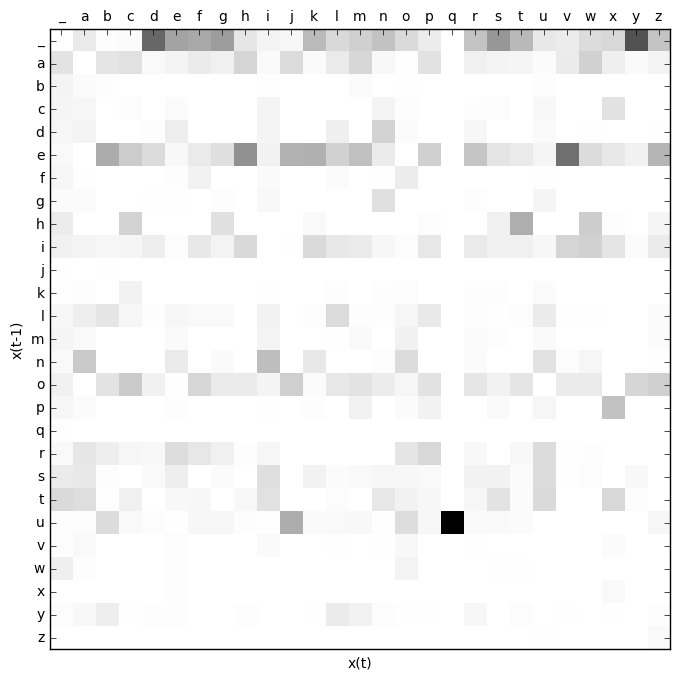

In [126]:
%matplotlib inline
import matplotlib.pylab as plt

# Reduction table
my2ascii_table = {
    ord(u'â'):"a",
    ord(u'ä'):"e",
    ord(u"à"):"a",
    ord(u"æ"):"a",
    ord(u'ç'):"c",
    ord(u"é"):"e",
    ord(u"è"):"e",
    ord(u"ê"):"e",
    ord(u"ë"):"e",
    ord(u'ğ'):"g",
    ord(u'ı'):"i",
    ord(u"î"):"i",
    ord(u'ï'):"i",
    ord(u'œ'):"o",
    ord(u"ô"):"o",
    ord(u'ö'):"o",
    ord(u'ş'):"s",
    ord(u'ù'):"u",
    ord(u"û"):"u",
    ord(u'ü'):"u",
    ord(u'ß'):"s"
    }


def letter2idx(x):
    if x=='_':
        i = 0
    else:
        i = ord(x)-ord('a')+1
    
    if i<0 or i>26:
        i = ord(my2ascii_table[ord(x)])-ord('a')+1
        
    return i

T = np.zeros((27,27))
# Convert bigrams to a transition matrix
for pair in bigrams:
    c = pair[1]
    s = list(pair[0])
    j = letter2idx(s[0])
    i = letter2idx(s[1])
    T[i,j] += c

plt.figure(figsize=(8,8))

alphabet=[chr(i+ord('a')) for i in range(26) ]
alphabet.insert(0,'_')
M = len(alphabet)

plt.imshow(T/np.sum(T,axis=0), interpolation='nearest', vmin=0,cmap='gray_r')
plt.xticks(range(M), alphabet)
plt.xlabel('x(t)')
plt.yticks(range(M), alphabet)
plt.ylabel('x(t-1)')
ax = plt.gca()
ax.xaxis.tick_top()
#ax.set_title(f, va='bottom')
plt.xlabel('x(t)')

plt.show()



## Monte Carlo with Spark

In [151]:
import numpy as np
import pyspark

def sample(p):
    x, y = 2*np.random.rand()-1, 2*np.random.rand()-1
    return 1 if x*x + y*y < 1 else 0

NUM_SAMPLES = 100000

count = sc.parallelize(xrange(0, NUM_SAMPLES)).map(sample).reduce(lambda a, b: a + b)

print("Pi is roughly %f" % (4.0 * count / NUM_SAMPLES))

Pi is roughly 3.158720


Spark application: 
* a driver program that runs the user’s main function, that executes various parallel operations on a cluster. 

Main abstraction: 
* resilient distributed dataset (RDD), 
* a collection of elements partitioned across the nodes of the cluster that can be operated on in parallel. 

RDD: 
* Created from a file in the Hadoop file system (or any other Hadoop-supported file system)
* Automatically recover from node failures.

Cached: 
* Ask Spark to persist an RDD in memory

Shared variables: 
* broadcast variables: cache a value in memory on all nodes, 
* accumulators: counters and sums.



Spark’s Python API data formats (as of Nov 2016):

* SparkContext.wholeTextFiles:
read a directory containing of multiple small text files, return (filename, content) pairs. 

* RDD.saveAsPickleFile and SparkContext.pickleFile:
save an RDD as pickled Python objects. 

* SequenceFile and Hadoop Input/Output Formats

